In [882]:
import numpy as np   
import pandas as pd
import os
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

In [883]:
df = pd.read_excel('Election_Data.xlsx', sheet_name='Election_Dataset')

In [884]:
df.head(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


In [885]:
df = df.drop('Unnamed: 0', axis = 1)

In [886]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
gender                     1525 non-null object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [887]:
df['economic.cond.national'].value_counts()

3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64

In [888]:
df['economic.cond.household'].value_counts()

3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

In [889]:
df['Blair'].value_counts()

4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64

In [890]:
df['Hague'].value_counts()

2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64

In [891]:
df['Europe'].value_counts()

11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64

In [892]:
df['political.knowledge'].value_counts()

2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64

In [893]:
df['gender'].value_counts()

female    812
male      713
Name: gender, dtype: int64

In [894]:
cat=["economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","gender"]

In [895]:
for i in cat:
    df[i]=df[i].astype("object")

In [896]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null object
economic.cond.household    1525 non-null object
Blair                      1525 non-null object
Hague                      1525 non-null object
Europe                     1525 non-null object
political.knowledge        1525 non-null object
gender                     1525 non-null object
dtypes: int64(1), object(8)
memory usage: 107.4+ KB


In [897]:
df[cat].describe().T

,count,unique,top,freq
economic.cond.national,1525,5,3,607
economic.cond.household,1525,5,3,648
Blair,1525,5,4,836
Hague,1525,5,2,624
Europe,1525,11,11,338
political.knowledge,1525,4,2,782
gender,1525,2,female,812


In [898]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0


In [899]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    257
4    542
3    607
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    440
3    648
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    153
2    438
4    836
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    558
2    624
Name: Hague, dtype: int64


EUROPE :  11
2      79
7      86
10    101
1     109
9     111
8     112
5     124
4     127
3     129
6     209
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    250
0    455
2    782
Name: political.knowledge, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [900]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [901]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [902]:
df.rename(columns = {"economic.cond.national": "economic_cond_national","economic.cond.household": "economic_cond_household","political.knowledge":"political_knowledge"},inplace=True)

In [903]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
vote                       1525 non-null object
age                        1525 non-null int64
economic_cond_national     1525 non-null object
economic_cond_household    1525 non-null object
Blair                      1525 non-null object
Hague                      1525 non-null object
Europe                     1525 non-null object
political_knowledge        1525 non-null object
gender                     1525 non-null object
dtypes: int64(1), object(8)
memory usage: 107.4+ KB


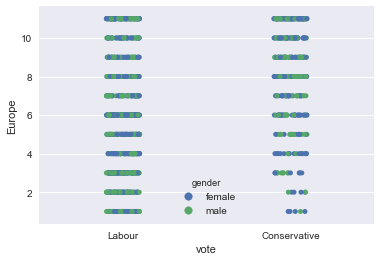

In [920]:
plt.figure(figsize=(6,4))
sns.stripplot(df.vote, df.Europe, hue = df.gender, jitter=True) 
plt.show()

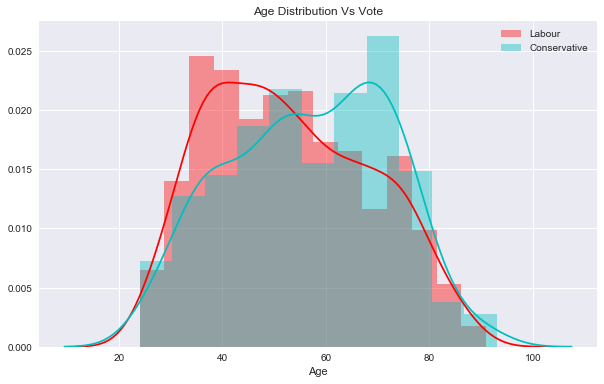

In [921]:
f, ax = plt.subplots(figsize = (10,6))
sns.distplot(df[df.vote=='Labour'].age, label = 'Labour', color = 'r')
sns.distplot(df[df.vote=='Conservative'].age, label = 'Conservative', color = 'c')
ax.set_title("Age Distribution Vs Vote",fontsize=12)
ax.set_xlabel('Age')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

In [931]:
#df.gender = df.gender.astype('category')
#df.gender = df.gender.cat.codes
df.vote = df.vote.astype('category')
df.vote = df.vote.cat.codes
df.head()
# Female 0, Male 1
# Conservative 0, Labour 1

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
0,1,43,3,3,4,1,2,2,female
1,1,36,4,4,4,4,5,2,male
2,1,35,4,4,5,2,3,2,male
3,1,24,4,2,2,1,4,0,female
4,1,41,2,2,1,1,6,2,male


In [933]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
vote                       1525 non-null int8
age                        1525 non-null int64
economic_cond_national     1525 non-null object
economic_cond_household    1525 non-null object
Blair                      1525 non-null object
Hague                      1525 non-null object
Europe                     1525 non-null object
political_knowledge        1525 non-null object
gender                     1525 non-null object
dtypes: int64(1), int8(1), object(7)
memory usage: 96.9+ KB


In [934]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['economic_cond_national', 'economic_cond_household', 'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender']
['vote', 'age']


In [935]:
df = pd.get_dummies(df, columns= cat ,drop_first=True)

In [936]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 32 columns):
vote                         1525 non-null int8
age                          1525 non-null int64
economic_cond_national_2     1525 non-null uint8
economic_cond_national_3     1525 non-null uint8
economic_cond_national_4     1525 non-null uint8
economic_cond_national_5     1525 non-null uint8
economic_cond_household_2    1525 non-null uint8
economic_cond_household_3    1525 non-null uint8
economic_cond_household_4    1525 non-null uint8
economic_cond_household_5    1525 non-null uint8
Blair_2                      1525 non-null uint8
Blair_3                      1525 non-null uint8
Blair_4                      1525 non-null uint8
Blair_5                      1525 non-null uint8
Hague_2                      1525 non-null uint8
Hague_3                      1525 non-null uint8
Hague_4                      1525 non-null uint8
Hague_5                      1525 non-null uint8
Europe_2    

## Train - Test Split

In [937]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = df['vote']

In [938]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=27)

## Logistic Regression Model

In [939]:
from sklearn.linear_model import LogisticRegression
# Fit the Logistic Regression model
#logit_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',n_jobs=2)
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

LogisticRegression()

In [940]:
ytrain_predict = logit_model.predict(X_train)
ytest_predict = logit_model.predict(X_test)

In [941]:
ytest_predict_prob=logit_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sample(10)

,0,1
311,0.891038,0.108962
156,0.147830,0.852170
312,0.859586,0.140414
308,0.201896,0.798104
287,0.860783,0.139217
387,0.162627,0.837373
126,0.113862,0.886138
332,0.371046,0.628954
448,0.040365,0.959635
125,0.852421,0.147579


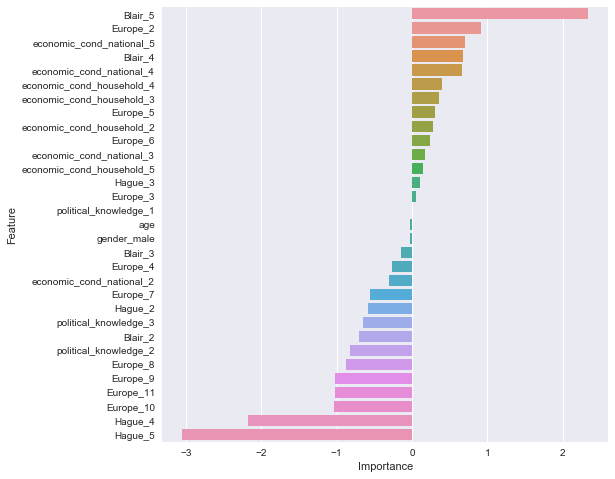

In [942]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : logit_model.coef_[0]})
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(8,8))
sns.barplot(y='Feature', x='Importance', data=feature_rank)

In [943]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [944]:
def performance_matrices(model, X_data, y_data, y_predicted):
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_df=pd.DataFrame(metrics).transpose()
    # Keeping the performance matrices of minority class, conservative
    precision=round(met_df.loc["0"][0],2)
    recall=round(met_df.loc["0"][1],2)
    f1=round(met_df.loc["0"][2],2)
    return (met_df, accuracy,precision,recall,f1);

In [945]:
logit_met,logit_train_accu, logit_train_precision, logit_train_recall, logit_train_f1 = performance_matrices(logit_model, X_train, y_train, ytrain_predict)
print ('logit_train_accu ',logit_train_accu)
print ('logit_train_precision ',logit_train_precision)
print ('logit_train_recall ',logit_train_recall)
print ('logit_train_f1 ',logit_train_f1)

logit_train_accu  0.85
logit_train_precision  0.79
logit_train_recall  0.68
logit_train_f1  0.73


In [946]:
logit_met

,precision,recall,f1-score,support
0,0.790036,0.680982,0.731466,326.000000
1,0.867684,0.920378,0.893255,741.000000
accuracy,0.847235,0.847235,0.847235,0.847235
macro avg,0.828860,0.800680,0.812360,1067.000000
weighted avg,0.843960,0.847235,0.843824,1067.000000


In [947]:
def draw_cm(actual, predicted, title):
    cm = confusion_matrix(actual, predicted, [0,1])
    plt.subplots(figsize=(4,3))
    ax = sns.heatmap(cm, cmap = 'Paired', annot=True, fmt='.0f',annot_kws={"fontsize":12},
              xticklabels = ["Con", "Lab"],
              yticklabels = ["Con", "Lab"],
                    cbar = False)
    bottom, top = ax.get_ylim()
    ax.set_ylim (bottom + 0.5, top - 0.5)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.show()

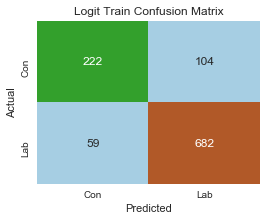

In [948]:
draw_cm(y_train,ytrain_predict,"Logit Train Confusion Matrix")

In [949]:
def draw_auc_roc(model, X_data, y_data, line_color, title):
    probs = model.predict_proba(X_data)
    probs = probs[:, 1]
    model_auc = roc_auc_score(y_data, probs)
    model_fpr, model_tpr, thresholds = roc_curve(y_data, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(model_fpr, model_tpr, color = line_color)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    # show the plot
    plt.show()
    return model_auc, model_fpr, model_tpr;

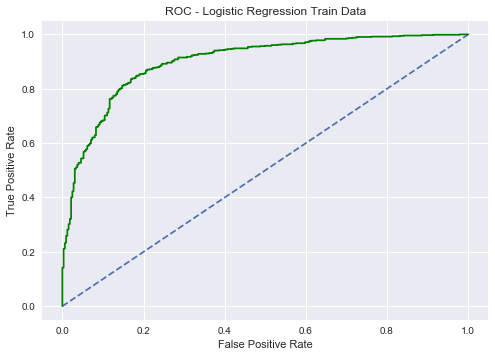

logit_train_auc 0.8998679449922589


In [950]:
logit_train_auc, logit_train_fpr, logit_train_tpr = draw_auc_roc(logit_model, X_train, y_train, 'g', 'ROC - Logistic Regression Train Data')
print('logit_train_auc', logit_train_auc)

In [951]:
logit_met,logit_test_accu, logit_test_precision, logit_test_recall, logit_test_f1 = performance_matrices(logit_model, X_test, y_test, ytest_predict)
print ('logit_test_accu ',logit_test_accu)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_accu  0.81
logit_test_precision  0.69
logit_test_recall  0.68
logit_test_f1  0.68


In [952]:
logit_met

,precision,recall,f1-score,support
0,0.686567,0.676471,0.681481,136.000000
1,0.864198,0.869565,0.866873,322.000000
accuracy,0.812227,0.812227,0.812227,0.812227
macro avg,0.775382,0.773018,0.774177,458.000000
weighted avg,0.811451,0.812227,0.811822,458.000000


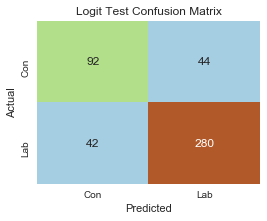

In [953]:
draw_cm(y_test,ytest_predict,"Logit Test Confusion Matrix")

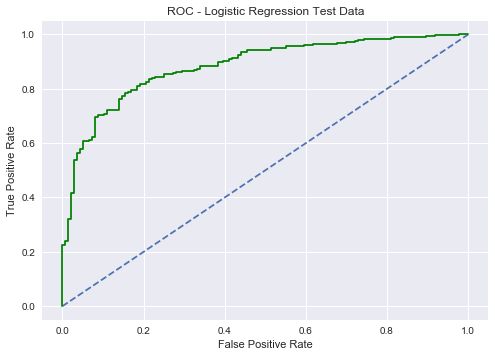

logit_test_auc 0.8829009864815491


In [954]:
logit_test_auc, logit_test_fpr, logit_test_tpr = draw_auc_roc(logit_model, X_test, y_test, 'g', 'ROC - Logistic Regression Test Data')
print('logit_test_auc', logit_test_auc)

## LDA Model

In [955]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
LDA_model=clf.fit(X_train,y_train)
LDA_model

LinearDiscriminantAnalysis()

In [956]:
ytrain_predict = LDA_model.predict(X_train)
ytest_predict = LDA_model.predict(X_test)

In [957]:
ytest_predict_prob=logit_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head(10)

,0,1
0,0.642394,0.357606
1,0.028393,0.971607
2,0.709083,0.290917
3,0.449113,0.550887
4,0.057219,0.942781
5,0.016389,0.983611
6,0.245845,0.754155
7,0.007038,0.992962
8,0.557540,0.442460
9,0.560724,0.439276


In [958]:
LDA_met,LDA_train_accu,LDA_train_precision,LDA_train_recall,LDA_train_f1 = performance_matrices(LDA_model, X_train, y_train, ytrain_predict)
print ('LDA_train_accu ',LDA_train_accu)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_accu  0.85
LDA_train_precision  0.77
LDA_train_recall  0.71
LDA_train_f1  0.74


In [959]:
LDA_met

,precision,recall,f1-score,support
0,0.773333,0.711656,0.741214,326.000000
1,0.877445,0.908232,0.892573,741.000000
accuracy,0.848172,0.848172,0.848172,0.848172
macro avg,0.825389,0.809944,0.816894,1067.000000
weighted avg,0.845636,0.848172,0.846328,1067.000000


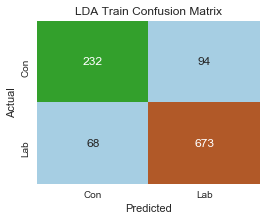

In [960]:
draw_cm(y_train,ytrain_predict,"LDA Train Confusion Matrix")

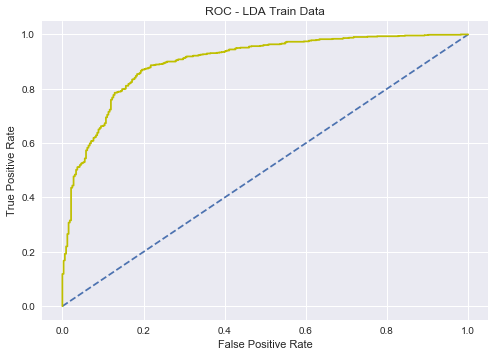

LDA_train_auc 0.8989199639022049


In [961]:
LDA_train_auc, LDA_train_fpr, LDA_train_tpr = draw_auc_roc(LDA_model, X_train, y_train, 'y', 'ROC - LDA Train Data')
print('LDA_train_auc', LDA_train_auc)

In [962]:
LDA_met,LDA_test_accu,LDA_test_precision,LDA_test_recall,LDA_test_f1 = performance_matrices(LDA_model, X_test, y_test, ytest_predict)
print ('LDA_test_accu ',LDA_test_accu)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_accu  0.82
LDA_test_precision  0.69
LDA_test_recall  0.72
LDA_test_f1  0.71


In [963]:
LDA_met

,precision,recall,f1-score,support
0,0.690141,0.720588,0.705036,136.000000
1,0.879747,0.863354,0.871473,322.000000
accuracy,0.820961,0.820961,0.820961,0.820961
macro avg,0.784944,0.791971,0.788255,458.000000
weighted avg,0.823445,0.820961,0.822051,458.000000


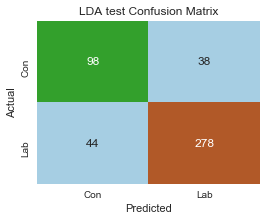

In [964]:
draw_cm(y_test,ytest_predict,"LDA test Confusion Matrix")

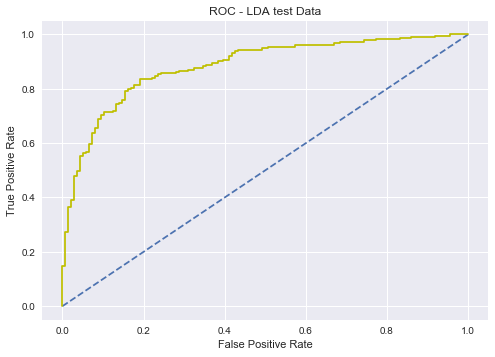

LDA_test_auc 0.8821245889660212


In [965]:
LDA_test_auc, LDA_test_fpr, LDA_test_tpr = draw_auc_roc(LDA_model, X_test, y_test, 'y', 'ROC - LDA test Data')
print('LDA_test_auc', LDA_test_auc)

## KNN Model

In [966]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [967]:
ytrain_predict = KNN_model.predict(X_train)
ytest_predict = KNN_model.predict(X_test)

In [968]:
KNN_met,KNN_train_accu,KNN_train_precision,KNN_train_recall,KNN_train_f1 = performance_matrices(KNN_model, X_train, y_train, ytrain_predict)
print ('KNN_train_accu ',KNN_train_accu)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_accu  0.81
KNN_train_precision  0.76
KNN_train_recall  0.56
KNN_train_f1  0.65


In [969]:
KNN_met

,precision,recall,f1-score,support
0,0.764706,0.558282,0.645390,326.000000
1,0.826297,0.924426,0.872611,741.000000
accuracy,0.812559,0.812559,0.812559,0.812559
macro avg,0.795501,0.741354,0.759001,1067.000000
weighted avg,0.807479,0.812559,0.803189,1067.000000


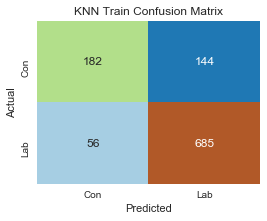

In [970]:
draw_cm(y_train,ytrain_predict,"KNN Train Confusion Matrix")

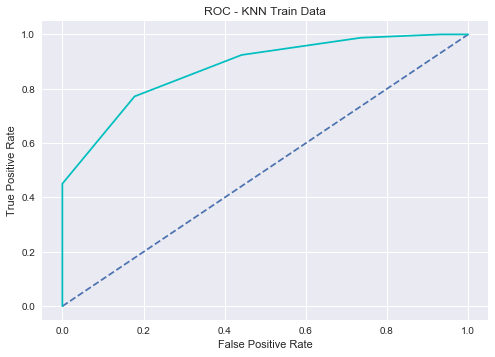

KNN_train_auc 0.8766920841509153


In [971]:
KNN_train_auc, KNN_train_fpr, KNN_train_tpr = draw_auc_roc(KNN_model, X_train, y_train, 'c', 'ROC - KNN Train Data')
print('KNN_train_auc', KNN_train_auc)

In [972]:
KNN_met,KNN_test_accu,KNN_test_precision,KNN_test_recall,KNN_test_f1 = performance_matrices(KNN_model, X_test, y_test, ytest_predict)
print ('KNN_test_accu ',KNN_test_accu)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_accu  0.73
KNN_test_precision  0.56
KNN_test_recall  0.45
KNN_test_f1  0.5


In [973]:
KNN_met

,precision,recall,f1-score,support
0,0.559633,0.448529,0.497959,136.000000
1,0.785100,0.850932,0.816692,322.000000
accuracy,0.731441,0.731441,0.731441,0.731441
macro avg,0.672367,0.649731,0.657325,458.000000
weighted avg,0.718149,0.731441,0.722046,458.000000


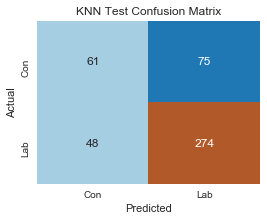

In [974]:
draw_cm(y_test,ytest_predict,"KNN Test Confusion Matrix")

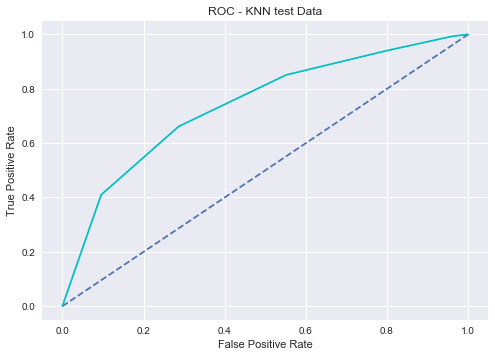

KNN_test_auc 0.7393131165509682


In [975]:
KNN_test_auc, KNN_test_fpr, KNN_test_tpr = draw_auc_roc(KNN_model, X_test, y_test, 'c', 'ROC - KNN test Data')
print('KNN_test_auc', KNN_test_auc)

## Naive Bayes Model

Choosing Multinomial Naive Bayes as the data is multinomial in nature

In [976]:
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
MNB_model = MultinomialNB()
#MNB_model = GaussianNB()
MNB_model.fit(X_train, y_train)

MultinomialNB()

In [977]:
ytrain_predict = MNB_model.predict(X_train)
ytest_predict = MNB_model.predict(X_test)

In [978]:
MNB_met,MNB_train_accu,MNB_train_precision,MNB_train_recall,MNB_train_f1 = performance_matrices(MNB_model, X_train, y_train, ytrain_predict)
print ('MNB_train_accu ',MNB_train_accu)
print ('MNB_train_precision ',MNB_train_precision)
print ('MNB_train_recall ',MNB_train_recall)
print ('MNB_train_f1 ',MNB_train_f1)

MNB_train_accu  0.82
MNB_train_precision  0.72
MNB_train_recall  0.7
MNB_train_f1  0.71


In [979]:
MNB_met

,precision,recall,f1-score,support
0,0.716088,0.696319,0.706065,326.000000
1,0.868000,0.878543,0.873239,741.000000
accuracy,0.822868,0.822868,0.822868,0.822868
macro avg,0.792044,0.787431,0.789652,1067.000000
weighted avg,0.821586,0.822868,0.822163,1067.000000


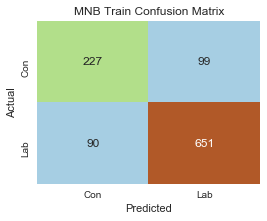

In [980]:
draw_cm(y_train,ytrain_predict,"MNB Train Confusion Matrix")

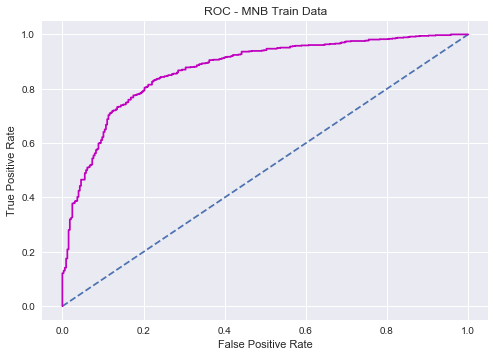

MNB_train_auc 0.8713829760810712


In [981]:
MNB_train_auc, MNB_train_fpr, MNB_train_tpr = draw_auc_roc(MNB_model, X_train, y_train, 'm', 'ROC - MNB Train Data')
print('MNB_train_auc', MNB_train_auc)

In [982]:
MNB_met,MNB_test_accu,MNB_test_precision,MNB_test_recall,MNB_test_f1 = performance_matrices(MNB_model, X_test, y_test, ytest_predict)
print ('MNB_test_accu ',MNB_test_accu)
print ('MNB_test_precision ',MNB_test_precision)
print ('MNB_test_recall ',MNB_test_recall)
print ('MNB_test_f1 ',MNB_test_f1)

MNB_test_accu  0.8
MNB_test_precision  0.67
MNB_test_recall  0.66
MNB_test_f1  0.67


In [983]:
MNB_met

,precision,recall,f1-score,support
0,0.671642,0.661765,0.666667,136.000000
1,0.858025,0.863354,0.860681,322.000000
accuracy,0.803493,0.803493,0.803493,0.803493
macro avg,0.764833,0.762559,0.763674,458.000000
weighted avg,0.802680,0.803493,0.803070,458.000000


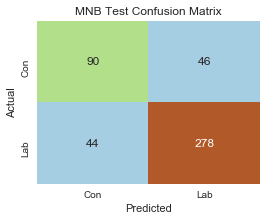

In [984]:
draw_cm(y_test,ytest_predict,"MNB Test Confusion Matrix")

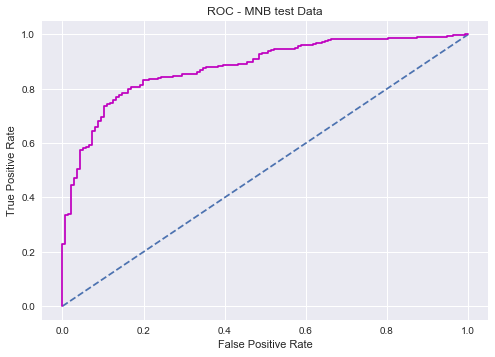

MNB_test_auc 0.879589879430033


In [985]:
MNB_test_auc, MNB_test_fpr, MNB_test_tpr = draw_auc_roc(MNB_model, X_test, y_test, 'm', 'ROC - MNB test Data')
print('MNB_test_auc', MNB_test_auc)

## SVM Model

In [986]:
from sklearn import svm

SVM_model= svm.SVC(probability=True,random_state=1)
SVM_model.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [987]:
ytrain_predict = SVM_model.predict(X_train)
ytest_predict = SVM_model.predict(X_test)

In [988]:
SVM_met,SVM_train_accu,SVM_train_precision,SVM_train_recall,SVM_train_f1 = performance_matrices(SVM_model, X_train, y_train, ytrain_predict)
print ('SVM_train_accu ',SVM_train_accu)
print ('SVM_train_precision ',SVM_train_precision)
print ('SVM_train_recall ',SVM_train_recall)
print ('SVM_train_f1 ',SVM_train_f1)

SVM_train_accu  0.69
SVM_train_precision  0.0
SVM_train_recall  0.0
SVM_train_f1  0.0


In [989]:
SVM_met

,precision,recall,f1-score,support
0,0.000000,0.00000,0.000000,326.00000
1,0.694470,1.00000,0.819690,741.00000
accuracy,0.694470,0.69447,0.694470,0.69447
macro avg,0.347235,0.50000,0.409845,1067.00000
weighted avg,0.482289,0.69447,0.569251,1067.00000


In [990]:
#draw_cm(y_train,ytrain_predict,"SVM Train Confusion Matrix")

In [991]:
#SVM_train_auc, SVM_train_fpr, SVM_train_tpr = draw_auc_roc(SVM_model, X_train, y_train, 'r', 'ROC - SVM Train Data')
#print('SVM_train_auc', SVM_train_auc)

In [992]:
SVM_met,SVM_test_accu,SVM_test_precision,SVM_test_recall,SVM_test_f1 = performance_matrices(SVM_model, X_test, y_test, ytest_predict)
print ('SVM_test_accu ',SVM_test_accu)
print ('SVM_test_precision ',SVM_test_precision)
print ('SVM_test_recall ',SVM_test_recall)
print ('SVM_test_f1 ',SVM_test_f1)

SVM_test_accu  0.7
SVM_test_precision  0.0
SVM_test_recall  0.0
SVM_test_f1  0.0


In [993]:
SVM_met

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,136.000000
1,0.703057,1.000000,0.825641,322.000000
accuracy,0.703057,0.703057,0.703057,0.703057
macro avg,0.351528,0.500000,0.412821,458.000000
weighted avg,0.494289,0.703057,0.580473,458.000000


In [994]:
#draw_cm(y_test,ytest_predict,"SVM Test Confusion Matrix")

In [995]:
#SVM_test_auc, SVM_test_fpr, SVM_test_tpr = draw_auc_roc(SVM_model, X_test, y_test, 'r', 'ROC - SVM test Data')
#print('SVM_test_auc', SVM_test_auc)

## Model Tuning

In [996]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

In [997]:
print('Before SMOTE: ',X_train.shape)
print('After SMOTE: ',X_train_res.shape)

Before SMOTE:  (1067, 31)
After SMOTE:  (1482, 31)


In [1000]:
logit_res_met,logit_res_test_accu,logit_res_test_precision,logit_res_test_recall,logit_res_test_f1 = performance_matrices(logit_res_model, X_test, y_test, ytest_predict)
print ('logit_res_test_accu ',logit_res_test_accu)
print ('logit_res_test_precision ',logit_res_test_precision)
print ('logit_res_test_recall ',logit_res_test_recall)
print ('logit_res_test_f1 ',logit_res_test_f1)

logit_res_test_accu  0.81
logit_res_test_precision  0.66
logit_res_test_recall  0.73
logit_res_test_f1  0.69


In [1001]:
logit_res_met

,precision,recall,f1-score,support
0,0.664430,0.727941,0.694737,136.000000
1,0.880259,0.844720,0.862124,322.000000
accuracy,0.810044,0.810044,0.810044,0.810044
macro avg,0.772344,0.786331,0.778430,458.000000
weighted avg,0.816170,0.810044,0.812419,458.000000


In [1003]:
ytrain_predict = KNN_res_model.predict(X_train_res)
ytest_predict = KNN_res_model.predict(X_test)

In [1004]:
KNN_res_met,KNN_res_test_accu,KNN_res_test_precision,KNN_res_test_recall,KNN_res_test_f1 = performance_matrices(KNN_res_model, X_test, y_test, ytest_predict)
print ('KNN_res_test_accu ',KNN_res_test_accu)
print ('KNN_res_test_precision ',KNN_res_test_precision)
print ('KNN_res_test_recall ',KNN_res_test_recall)
print ('KNN_res_test_f1 ',KNN_res_test_f1)

KNN_res_test_accu  0.66
KNN_res_test_precision  0.46
KNN_res_test_recall  0.76
KNN_res_test_f1  0.57


In [1005]:
KNN_res_met

,precision,recall,f1-score,support
0,0.457778,0.757353,0.570637,136.000000
1,0.858369,0.621118,0.720721,322.000000
accuracy,0.661572,0.661572,0.661572,0.661572
macro avg,0.658073,0.689235,0.645679,458.000000
weighted avg,0.739416,0.661572,0.676154,458.000000


In [1006]:
KNN_met

,precision,recall,f1-score,support
0,0.559633,0.448529,0.497959,136.000000
1,0.785100,0.850932,0.816692,322.000000
accuracy,0.731441,0.731441,0.731441,0.731441
macro avg,0.672367,0.649731,0.657325,458.000000
weighted avg,0.718149,0.731441,0.722046,458.000000


In [1008]:
ytrain_predict = SVM_res_model.predict(X_train_res)
ytest_predict = SVM_res_model.predict(X_test)

In [1009]:
SVM_res_met,SVM_res_train_accu,SVM_res_train_precision,SVM_res_train_recall,SVM_res_train_f1 = performance_matrices(SVM_res_model, X_train_res, y_train_res, ytrain_predict)
print ('SVM_res_train_accu ',SVM_res_train_accu)
print ('SVM_res_train_precision ',SVM_res_train_precision)
print ('SVM_res_train_recall ',SVM_res_train_recall)
print ('SVM_res_train_f1 ',SVM_res_train_f1)

SVM_res_train_accu  0.6
SVM_res_train_precision  0.61
SVM_res_train_recall  0.55
SVM_res_train_f1  0.58


In [1010]:
SVM_res_met

,precision,recall,f1-score,support
0,0.609281,0.549258,0.577715,741.000000
1,0.589681,0.647773,0.617363,741.000000
accuracy,0.598516,0.598516,0.598516,0.598516
macro avg,0.599481,0.598516,0.597539,1482.000000
weighted avg,0.599481,0.598516,0.597539,1482.000000


In [1011]:
SVM_res_met,SVM_res_test_accu,SVM_res_test_precision,SVM_res_test_recall,SVM_res_test_f1 = performance_matrices(SVM_res_model, X_test, y_test, ytest_predict)
print ('SVM_res_test_accu ',SVM_res_test_accu)
print ('SVM_res_test_precision ',SVM_res_test_precision)
print ('SVM_res_test_recall ',SVM_res_test_recall)
print ('SVM_res_test_f1 ',SVM_res_test_f1)

SVM_res_test_accu  0.62
SVM_res_test_precision  0.4
SVM_res_test_recall  0.59
SVM_res_test_f1  0.48


In [1012]:
SVM_train_accu = SVM_res_train_accu
SVM_train_precision = SVM_res_train_precision
SVM_train_recall = SVM_res_train_recall
SVM_train_f1 = SVM_res_train_f1
SVM_test_accu = SVM_res_test_accu
SVM_test_precision  = SVM_res_test_precision
SVM_test_recall = SVM_res_test_recall 
SVM_test_f1 = SVM_res_test_f1

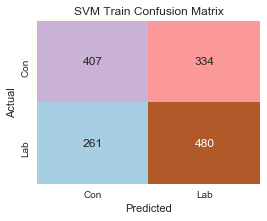

In [1013]:
draw_cm(y_train_res,ytrain_predict,"SVM Train Confusion Matrix")

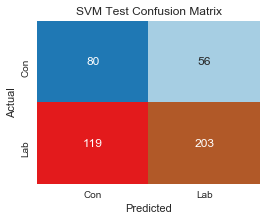

In [1014]:
draw_cm(y_test,ytest_predict,"SVM Test Confusion Matrix")

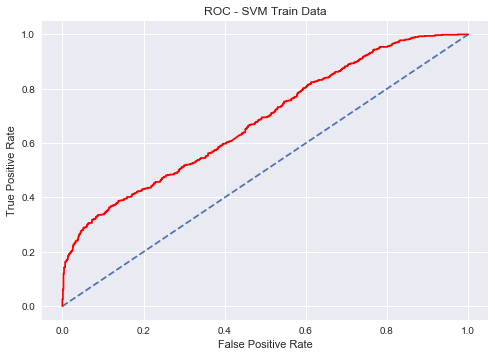

SVM_train_auc 0.6811381198766666


In [1015]:
SVM_train_auc, SVM_train_fpr, SVM_train_tpr = draw_auc_roc(SVM_res_model, X_train_res, y_train_res, 'r', 'ROC - SVM Train Data')
print('SVM_train_auc', SVM_train_auc)

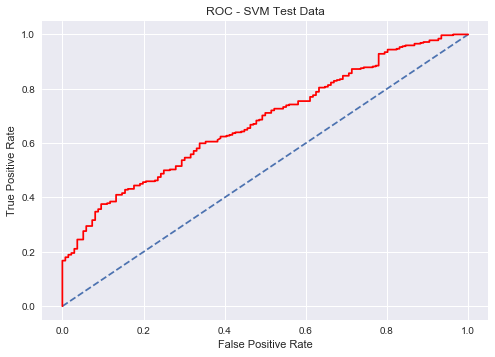

SVM_test_auc 0.6781832298136646


In [1016]:
SVM_test_auc, SVM_test_fpr, SVM_test_tpr = draw_auc_roc(SVM_res_model, X_test, y_test, 'r', 'ROC - SVM Test Data')
print('SVM_test_auc', SVM_test_auc)

## Cross Validation on models

In [1022]:
from sklearn.model_selection import cross_val_score

In [1023]:
scores = cross_val_score(MNB_model, X_train, y_train, cv=10)
scores

array([0.80373832, 0.8317757 , 0.74766355, 0.80373832, 0.88785047,
       0.81308411, 0.79439252, 0.81132075, 0.82075472, 0.82075472])

In [1024]:
MNB_train_CVmean = scores.mean()
MNB_train_CVdev = scores.std() * 2
print("MNB Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

MNB Train Accuracy: 0.81 (+/- 0.07)


In [1025]:
scores = cross_val_score(MNB_model, X_test, y_test, cv=10)
scores

array([0.86956522, 0.80434783, 0.86956522, 0.7173913 , 0.80434783,
       0.82608696, 0.82608696, 0.80434783, 0.75555556, 0.8       ])

In [1026]:
MNB_test_CVmean = scores.mean()
MNB_test_CVdev = scores.std() * 2
print("MNB Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

MNB Test Accuracy: 0.81 (+/- 0.09)


In [1027]:
scores = cross_val_score(SVM_res_model, X_train, y_train, cv=10)
scores

array([0.70093458, 0.69158879, 0.69158879, 0.69158879, 0.69158879,
       0.69158879, 0.69158879, 0.69811321, 0.69811321, 0.69811321])

In [1028]:
SVM_train_CVmean = scores.mean()
SVM_train_CVdev = scores.std() * 2
print("SVM Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

SVM Train Accuracy: 0.69 (+/- 0.01)


In [1029]:
scores = cross_val_score(SVM_res_model, X_test, y_test, cv=10)
scores

array([0.69565217, 0.69565217, 0.69565217, 0.69565217, 0.69565217,
       0.69565217, 0.7173913 , 0.7173913 , 0.71111111, 0.71111111])

In [1030]:
SVM_test_CVmean = scores.mean()
SVM_test_CVdev = scores.std() * 2
print("SVM Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

SVM Test Accuracy: 0.70 (+/- 0.02)


## Hyperparameter tuning using GridsearchCV

Logistic Regression

In [1031]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': [ 'l2', 'none']
               ,'C':np.logspace(-3,3,20)
               ,'solver' : ['newton-cg', 'lbfgs', 'sag' ,'saga' ]
              }
logit_model = GridSearchCV(clf, param_grid = grid_values,cv = 10, verbose=True)#, scoring = 'f1')
logit_model.fit(X_train_res, y_train_res)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  1.1min finished


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             verbose=True)

In [1034]:
logit_model.best_params_

{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg'}

In [1035]:
ytrain_predict = logit_model.predict(X_train_res)
ytest_predict = logit_model.predict(X_test)

In [1036]:
logit_met,logit_train_accu, logit_train_precision, logit_train_recall, logit_train_f1 = performance_matrices(logit_model, X_train_res, y_train_res, ytrain_predict)
print ('logit_train_accu ',logit_train_accu)
print ('logit_train_precision ',logit_train_precision)
print ('logit_train_recall ',logit_train_recall)
print ('logit_train_f1 ',logit_train_f1)

logit_train_accu  0.86
logit_train_precision  0.86
logit_train_recall  0.86
logit_train_f1  0.86


In [1037]:
logit_met

,precision,recall,f1-score,support
0,0.861789,0.858300,0.860041,741.000000
1,0.858871,0.862348,0.860606,741.000000
accuracy,0.860324,0.860324,0.860324,0.860324
macro avg,0.860330,0.860324,0.860323,1482.000000
weighted avg,0.860330,0.860324,0.860323,1482.000000


In [1038]:
logit_met,logit_test_accu, logit_test_precision, logit_test_recall, logit_test_f1 = performance_matrices(logit_model, X_test, y_test, ytest_predict)
print ('logit_test_accu ',logit_test_accu)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_accu  0.8
logit_test_precision  0.65
logit_test_recall  0.69
logit_test_f1  0.67


In [1039]:
logit_met

,precision,recall,f1-score,support
0,0.648276,0.691176,0.669039,136.000000
1,0.865815,0.841615,0.853543,322.000000
accuracy,0.796943,0.796943,0.796943,0.796943
macro avg,0.757045,0.766396,0.761291,458.000000
weighted avg,0.801218,0.796943,0.798756,458.000000


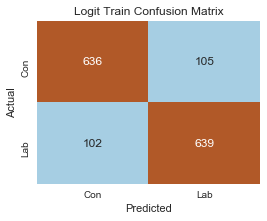

In [1040]:
draw_cm(y_train_res,ytrain_predict,"Logit Train Confusion Matrix")

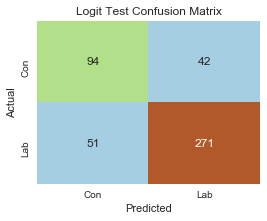

In [1041]:
draw_cm(y_test,ytest_predict,"Logit Test Confusion Matrix")

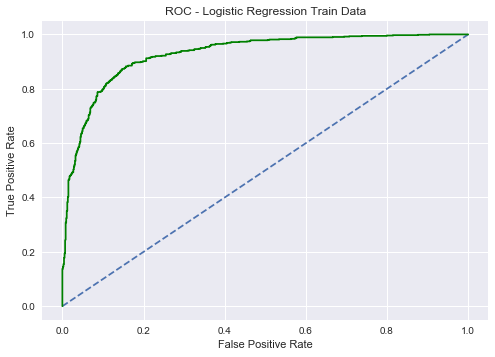

logit_train_auc 0.9275580469912454


In [1042]:
logit_train_auc, logit_train_fpr, logit_train_tpr = draw_auc_roc(logit_model, X_train_res, y_train_res, 'g', 'ROC - Logistic Regression Train Data')
print('logit_train_auc', logit_train_auc)

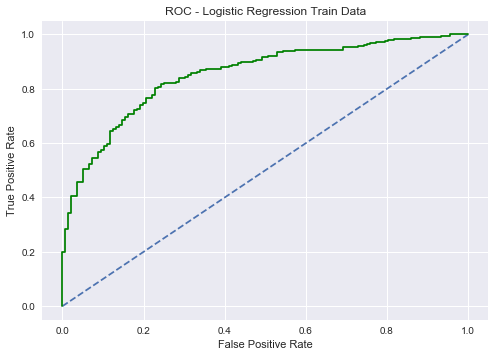

logit_test_auc 0.8508631713554988


In [1043]:
logit_test_auc, logit_test_fpr, logit_test_tpr = draw_auc_roc(logit_model, X_test, y_test, 'g', 'ROC - Logistic Regression Train Data')
print('logit_test_auc', logit_test_auc)

In [1044]:
scores = cross_val_score(logit_model, X_train_res, y_train_res, cv=10)
scores

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  1.1min finished


array([0.77181208, 0.79865772, 0.73648649, 0.76351351, 0.87837838,
       0.93243243, 0.85135135, 0.91216216, 0.88513514, 0.91891892])

In [1045]:
logit_train_CVmean = scores.mean()
logit_train_CVdev = scores.std() * 2
print("Logit Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Logit Train Accuracy: 0.84 (+/- 0.14)


In [1046]:
scores = cross_val_score(logit_model, X_test, y_test, cv=10)
scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:   47.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:   46.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:   47.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:   46.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:   53.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:   52.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:   46.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:   46.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:   46.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:   46.6s finished


array([0.84782609, 0.7173913 , 0.91304348, 0.73913043, 0.82608696,
       0.84782609, 0.84782609, 0.80434783, 0.73333333, 0.73333333])

In [1047]:
logit_test_CVmean = scores.mean()
logit_test_CVdev = scores.std() * 2
print("Logit Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Logit Test Accuracy: 0.80 (+/- 0.13)


Linear Discriminant Analysis

In [1048]:
clf = LinearDiscriminantAnalysis()
grid_values = {'solver': ['svd', 'lsqr', 'eigen'],
               'tol': [0.0001, 0.001]
              }
LDA_model = GridSearchCV(clf, param_grid = grid_values, cv = 10, verbose=True)#, scoring = 'f1')
LDA_model.fit(X_train_res, y_train_res)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.6s finished


GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001]},
             verbose=True)

In [1049]:
LDA_model.best_params_

{'solver': 'svd', 'tol': 0.0001}

In [1050]:
ytrain_predict = LDA_model.predict(X_train_res)
ytest_predict = LDA_model.predict(X_test)

In [1051]:
LDA_met,LDA_train_accu,LDA_train_precision,LDA_train_recall,LDA_train_f1 = performance_matrices(LDA_model, X_train_res, y_train_res, ytrain_predict)
print ('LDA_train_accu ',LDA_train_accu)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_accu  0.86
LDA_train_precision  0.86
LDA_train_recall  0.85
LDA_train_f1  0.86


In [1052]:
LDA_met

,precision,recall,f1-score,support
0,0.858503,0.851552,0.855014,741.000000
1,0.852744,0.859649,0.856183,741.000000
accuracy,0.855601,0.855601,0.855601,0.855601
macro avg,0.855624,0.855601,0.855598,1482.000000
weighted avg,0.855624,0.855601,0.855598,1482.000000


In [1053]:
LDA_met,LDA_test_accu,LDA_test_precision,LDA_test_recall,LDA_test_f1 = performance_matrices(LDA_model, X_test, y_test, ytest_predict)
print ('LDA_test_accu ',LDA_test_accu)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_accu  0.81
LDA_test_precision  0.66
LDA_test_recall  0.71
LDA_test_f1  0.69


In [1054]:
LDA_met

,precision,recall,f1-score,support
0,0.659864,0.713235,0.685512,136.000000
1,0.874598,0.844720,0.859400,322.000000
accuracy,0.805677,0.805677,0.805677,0.805677
macro avg,0.767231,0.778978,0.772456,458.000000
weighted avg,0.810834,0.805677,0.807765,458.000000


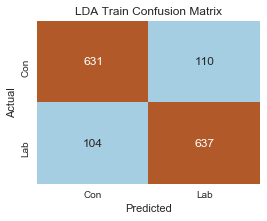

In [1055]:
draw_cm(y_train_res,ytrain_predict,"LDA Train Confusion Matrix")

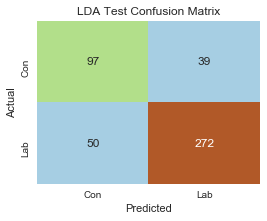

In [1056]:
draw_cm(y_test,ytest_predict,"LDA Test Confusion Matrix")

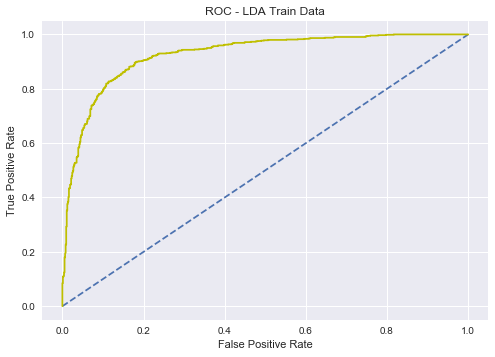

LDA_train_auc 0.9251995607205494


In [1057]:
LDA_train_auc, LDA_train_fpr, LDA_train_tpr = draw_auc_roc(LDA_model, X_train_res, y_train_res, 'y', 'ROC - LDA Train Data')
print('LDA_train_auc', LDA_train_auc)

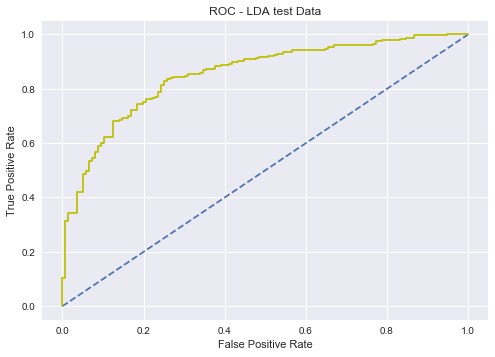

LDA_test_auc 0.853055352575813


In [1058]:
LDA_test_auc, LDA_test_fpr, LDA_test_tpr = draw_auc_roc(LDA_model, X_test, y_test, 'y', 'ROC - LDA test Data')
print('LDA_test_auc', LDA_test_auc)

In [1059]:
scores = cross_val_score(LDA_model, X_train_res, y_train_res, cv=10)
scores

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


array([0.7852349 , 0.7852349 , 0.73648649, 0.76351351, 0.88513514,
       0.90540541, 0.87162162, 0.90540541, 0.87162162, 0.91891892])

In [1060]:
LDA_train_CVmean = scores.mean()
LDA_train_CVdev = scores.std() * 2
print("LDA Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

LDA Train Accuracy: 0.84 (+/- 0.13)


In [1061]:
scores = cross_val_score(LDA_model, X_test, y_test, cv=10)
scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished


array([0.84782609, 0.73913043, 0.91304348, 0.76086957, 0.80434783,
       0.84782609, 0.82608696, 0.82608696, 0.77777778, 0.75555556])

In [1062]:
LDA_test_CVmean = scores.mean()
LDA_test_CVdev = scores.std() * 2
print("LDA Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

LDA Test Accuracy: 0.81 (+/- 0.10)


KNN Model

In [1063]:
clf = KNeighborsClassifier()
grid_values = {'n_neighbors': range(5,10),
               'metric': ['minkowski', 'euclidean', 'canberra']
              }
KNN_model = GridSearchCV(clf, param_grid = grid_values, cv = 10, verbose=True)#, scoring = 'f1')
KNN_model.fit(X_train_res, y_train_res)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.8s finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'canberra'],
                         'n_neighbors': range(5, 10)},
             verbose=True)

In [1064]:
KNN_model.best_params_

{'metric': 'canberra', 'n_neighbors': 7}

In [1065]:
ytrain_predict = KNN_model.predict(X_train_res)
ytest_predict = KNN_model.predict(X_test)

In [1066]:
KNN_met,KNN_train_accu,KNN_train_precision,KNN_train_recall,KNN_train_f1 = performance_matrices(KNN_model, X_train_res, y_train_res, ytrain_predict)
print ('KNN_train_accu ',KNN_train_accu)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_accu  0.85
KNN_train_precision  0.81
KNN_train_recall  0.93
KNN_train_f1  0.86


In [1067]:
KNN_met

,precision,recall,f1-score,support
0,0.807018,0.931174,0.864662,741.000000
1,0.918660,0.777328,0.842105,741.000000
accuracy,0.854251,0.854251,0.854251,0.854251
macro avg,0.862839,0.854251,0.853383,1482.000000
weighted avg,0.862839,0.854251,0.853383,1482.000000


In [1068]:
KNN_met,KNN_test_accu,KNN_test_precision,KNN_test_recall,KNN_test_f1 = performance_matrices(KNN_model, X_test, y_test, ytest_predict)
print ('KNN_test_accu ',KNN_test_accu)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_accu  0.74
KNN_test_precision  0.54
KNN_test_recall  0.75
KNN_test_f1  0.63


In [1069]:
KNN_met

,precision,recall,f1-score,support
0,0.539683,0.750000,0.627692,136.000000
1,0.873606,0.729814,0.795262,322.000000
accuracy,0.735808,0.735808,0.735808,0.735808
macro avg,0.706644,0.739907,0.711477,458.000000
weighted avg,0.774450,0.735808,0.745504,458.000000


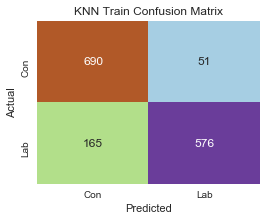

In [1070]:
draw_cm(y_train_res,ytrain_predict,"KNN Train Confusion Matrix")

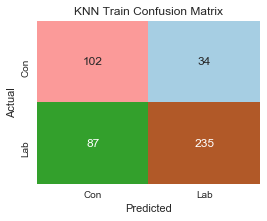

In [1071]:
draw_cm(y_test,ytest_predict,"KNN Train Confusion Matrix")

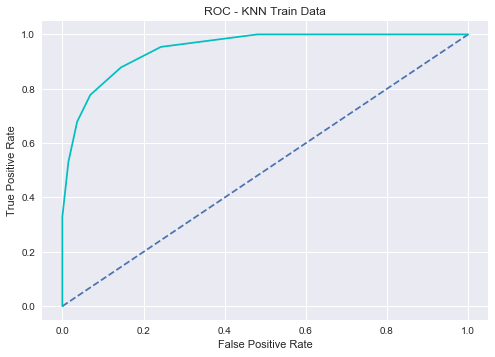

KNN_train_auc 0.9474949961845337


In [1072]:
KNN_train_auc, KNN_train_fpr, KNN_train_tpr = draw_auc_roc(KNN_model, X_train_res, y_train_res, 'c', 'ROC - KNN Train Data')
print('KNN_train_auc', KNN_train_auc)

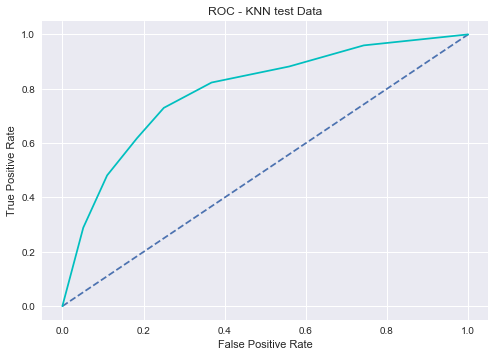

KNN_test_auc 0.7908407928388748


In [1073]:
KNN_test_auc, KNN_test_fpr, KNN_test_tpr = draw_auc_roc(KNN_model, X_test, y_test, 'c', 'ROC - KNN test Data')
print('KNN_test_auc', KNN_test_auc)

In [1074]:
scores = cross_val_score(KNN_model, X_train_res, y_train_res, cv=10)
scores

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.4s finished


array([0.79194631, 0.74496644, 0.74324324, 0.72297297, 0.80405405,
       0.85135135, 0.83108108, 0.85135135, 0.88513514, 0.83108108])

In [1075]:
KNN_train_CVmean = scores.mean()
KNN_train_CVdev = scores.std() * 2
print("KNN Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

KNN Train Accuracy: 0.81 (+/- 0.10)


In [1076]:
scores = cross_val_score(KNN_model, X_test, y_test, cv=10)
scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


array([0.89130435, 0.76086957, 0.86956522, 0.69565217, 0.7826087 ,
       0.76086957, 0.80434783, 0.7826087 , 0.68888889, 0.86666667])

In [1077]:
KNN_test_CVmean = scores.mean()
KNN_test_CVdev = scores.std() * 2
print("KNN Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

KNN Test Accuracy: 0.79 (+/- 0.13)


Multinomial Naive Bayes - No hyperparameters (except prior) to Gridsearch

Support Vector Machine - Gridsearch didnt improve performance

clf = svm.SVC()
grid_values = {'C': [ 1, 10, 100],#, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001],#, 0.0001], 
              'kernel': ['rbf']
              } 
SVC_model = GridSearchCV(clf, param_grid = grid_values, cv = 10, verbose=True)#, scoring = 'f1')

SVC_model.fit(X_train_res, y_train_res) 

SVC_model.best_params_

ytrain_predict = SVM_model.predict(X_train)
ytest_predict = SVM_model.predict(X_test)

SVM_met,SVM_train_accu,SVM_train_precision,SVM_train_recall,SVM_train_f1 = performance_matrices(SVM_model, X_train, y_train, ytrain_predict)
print ('SVM_train_accu ',SVM_train_accu)
print ('SVM_train_precision ',SVM_train_precision)
print ('SVM_train_recall ',SVM_train_recall)
print ('SVM_train_f1 ',SVM_train_f1)

SVM_met

SVM_met,SVM_test_accu,SVM_test_precision,SVM_test_recall,SVM_test_f1 = performance_matrices(SVM_model, X_test, y_test, ytest_predict)
print ('SVM_test_accu ',SVM_test_accu)
print ('SVM_test_precision ',SVM_test_precision)
print ('SVM_test_recall ',SVM_test_recall)
print ('SVM_test_f1 ',SVM_test_f1)

SVM_met

## Bagging using RandomForest

In [1162]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#rfcl = RandomForestClassifier(class_weight='balanced')
rfcl = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=20,random_state=1)
#Bagging_model.fit(X_train_res, y_train_res)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=20,
                  random_state=1)

In [1163]:
#ytrain_predict = Bagging_model.predict(X_train_res)
ytrain_predict = Bagging_model.predict(X_train)
ytest_predict = Bagging_model.predict(X_test)

In [1164]:
#Bagging_met,Bagging_train_accu,Bagging_train_precision,Bagging_train_recall,Bagging_train_f1 = performance_matrices(Bagging_model, X_train_res, y_train_res, ytrain_predict)
Bagging_met,Bagging_train_accu,Bagging_train_precision,Bagging_train_recall,Bagging_train_f1 = performance_matrices(Bagging_model, X_train, y_train, ytrain_predict)
print ('Bagging_train_accu ',Bagging_train_accu)
print ('Bagging_train_precision ',Bagging_train_precision)
print ('Bagging_train_recall ',Bagging_train_recall)
print ('Bagging_train_f1 ',Bagging_train_f1)

Bagging_train_accu  0.97
Bagging_train_precision  0.99
Bagging_train_recall  0.93
Bagging_train_f1  0.96


In [1165]:
Bagging_met

,precision,recall,f1-score,support
0,0.986971,0.929448,0.957346,326.000000
1,0.969737,0.994602,0.982012,741.000000
accuracy,0.974695,0.974695,0.974695,0.974695
macro avg,0.978354,0.962025,0.969679,1067.000000
weighted avg,0.975002,0.974695,0.974476,1067.000000


In [1166]:
Bagging_met,Bagging_test_accu,Bagging_test_precision,Bagging_test_recall,Bagging_test_f1 = performance_matrices(Bagging_model, X_test, y_test, ytest_predict)
print ('Bagging_test_accu ',Bagging_test_accu)
print ('Bagging_test_precision ',Bagging_test_precision)
print ('Bagging_test_recall ',Bagging_test_recall)
print ('Bagging_test_f1 ',Bagging_test_f1)

Bagging_test_accu  0.82
Bagging_test_precision  0.71
Bagging_test_recall  0.64
Bagging_test_f1  0.67


In [1167]:
Bagging_met

,precision,recall,f1-score,support
0,0.713115,0.639706,0.674419,136.000000
1,0.854167,0.891304,0.872340,322.000000
accuracy,0.816594,0.816594,0.816594,0.816594
macro avg,0.783641,0.765505,0.773380,458.000000
weighted avg,0.812282,0.816594,0.813569,458.000000


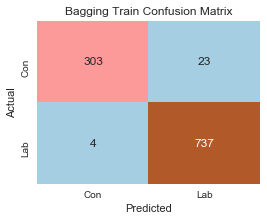

In [1168]:
draw_cm(y_train,ytrain_predict,"Bagging Train Confusion Matrix")
#draw_cm(y_train_res,ytrain_predict,"Bagging Train Confusion Matrix")

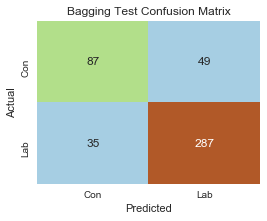

In [1169]:
draw_cm(y_test,ytest_predict,"Bagging Test Confusion Matrix")

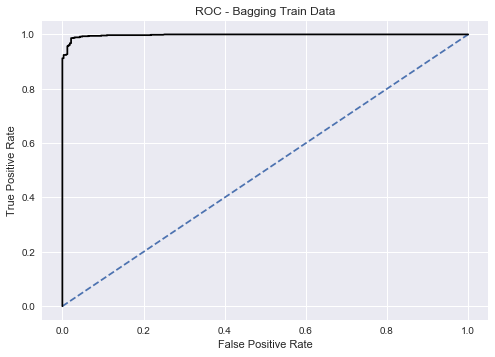

Bagging_train_auc 0.9977231895217041


In [1170]:
#Bagging_train_auc, Bagging_train_fpr, Bagging_train_tpr = draw_auc_roc(Bagging_model, X_train_res, y_train_res, 'k', 'ROC - Bagging Train Data')
Bagging_train_auc, Bagging_train_fpr, Bagging_train_tpr = draw_auc_roc(Bagging_model, X_train, y_train, 'k', 'ROC - Bagging Train Data')
print('Bagging_train_auc', Bagging_train_auc)

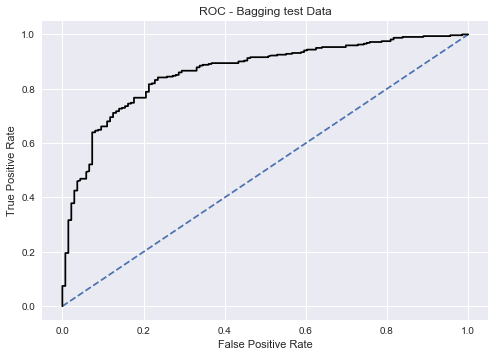

Bagging_test_auc 0.8627717391304347


In [1171]:
Bagging_test_auc, Bagging_test_fpr, Bagging_test_tpr = draw_auc_roc(Bagging_model, X_test, y_test, 'k', 'ROC - Bagging test Data')
print('Bagging_test_auc', Bagging_test_auc)

In [1088]:
scores = cross_val_score(Bagging_model, X_train_res, y_train_res, cv=10)
scores

array([0.80536913, 0.79194631, 0.74324324, 0.81081081, 0.89189189,
       0.90540541, 0.85135135, 0.88513514, 0.87837838, 0.87837838])

In [1089]:
Bagging_train_CVmean = scores.mean()
Bagging_train_CVdev = scores.std() * 2
print("Bagging Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Bagging Train Accuracy: 0.84 (+/- 0.10)


In [1090]:
scores = cross_val_score(Bagging_model, X_test, y_test, cv=10)
scores

array([0.82608696, 0.76086957, 0.82608696, 0.69565217, 0.73913043,
       0.73913043, 0.84782609, 0.76086957, 0.73333333, 0.8       ])

In [1091]:
Bagging_test_CVmean = scores.mean()
Bagging_test_CVdev = scores.std() * 2
print("Bagging Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Bagging Test Accuracy: 0.77 (+/- 0.09)


## XGBoost

In [1172]:
import xgboost as xgb
#grid_values = {'max_depth':[4,5,6],
#               'min_child_weight':[2,3,4]
#              }
#clf=xgb.XGBClassifier(learning_rate =0.01,
#                            n_estimators=1000,
#                            max_depth=5,
#                            min_child_weight=1,
#                            gamma=0,
#                            subsample=0.8,
#                            colsample_bytree=0.8,
#                            objective= 'binary:logistic',
#                            nthread=4,
#                            scale_pos_weight=1,
#                            seed = 27
#                           )

#XGB_model = GridSearchCV(clf, param_grid = grid_values, cv = 10, verbose=True)#, scoring = 'f1')
XGB_model = xgb.XGBClassifier(max_depth = 5,
                              min_child_weight = 3,
                              learning_rate =0.01,
                              n_estimators=1000,
                              #gamma=0,
                              #subsample=0.8,
                              #colsample_bytree=0.8,
                              #objective= 'binary:logistic',
                              #nthread=4,
                              #scale_pos_weight=1,
                              #seed = 27)
                             )
#XGB_model.fit(X_train_res, y_train_res)
XGB_model.fit(X_train, y_train)

XGBClassifier(learning_rate=0.01, max_depth=5, min_child_weight=3,
              n_estimators=1000)

In [1153]:
#XGB_model.best_params_

In [1173]:
#ytrain_predict = XGB_model.predict(X_train_res)
ytrain_predict = XGB_model.predict(X_train)
ytest_predict = XGB_model.predict(X_test)

In [1174]:
#XGB_met,XGB_train_accu,XGB_train_precision,XGB_train_recall,XGB_train_f1 = performance_matrices(XGB_model, X_train_res, y_train_res, ytrain_predict)
XGB_met,XGB_train_accu,XGB_train_precision,XGB_train_recall,XGB_train_f1 = performance_matrices(XGB_model, X_train, y_train, ytrain_predict)
print ('XGB_train_accu ',XGB_train_accu)
print ('XGB_train_precision ',XGB_train_precision)
print ('XGB_train_recall ',XGB_train_recall)
print ('XGB_train_f1 ',XGB_train_f1)

XGB_train_accu  0.91
XGB_train_precision  0.89
XGB_train_recall  0.79
XGB_train_f1  0.84


In [1175]:
XGB_met

,precision,recall,f1-score,support
0,0.893103,0.794479,0.840909,326.000000
1,0.913771,0.958165,0.935441,741.000000
accuracy,0.908154,0.908154,0.908154,0.908154
macro avg,0.903437,0.876322,0.888175,1067.000000
weighted avg,0.907456,0.908154,0.906559,1067.000000


In [1176]:
XGB_met,XGB_test_accu,XGB_test_precision,XGB_test_recall,XGB_test_f1 = performance_matrices(XGB_model, X_test, y_test, ytest_predict)
print ('XGB_test_accu ',XGB_test_accu)
print ('XGB_test_precision ',XGB_test_precision)
print ('XGB_test_recall ',XGB_test_recall)
print ('XGB_test_f1 ',XGB_test_f1)

XGB_test_accu  0.81
XGB_test_precision  0.68
XGB_test_recall  0.67
XGB_test_f1  0.68


In [1177]:
XGB_met

,precision,recall,f1-score,support
0,0.684211,0.669118,0.676580,136.000000
1,0.861538,0.869565,0.865533,322.000000
accuracy,0.810044,0.810044,0.810044,0.810044
macro avg,0.772874,0.769341,0.771057,458.000000
weighted avg,0.808882,0.810044,0.809425,458.000000


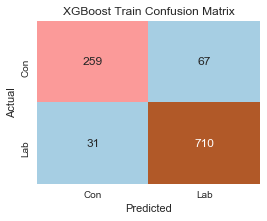

In [1178]:
draw_cm(y_train,ytrain_predict,"XGBoost Train Confusion Matrix")
#draw_cm(y_train_res,ytrain_predict,"XGBoost Train Confusion Matrix")

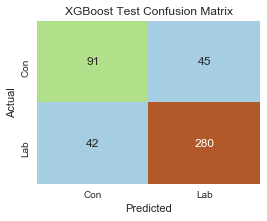

In [1179]:
draw_cm(y_test,ytest_predict,"XGBoost Test Confusion Matrix")

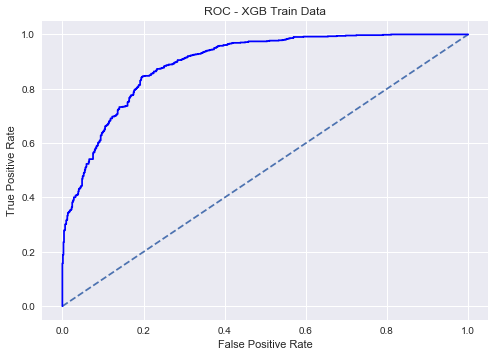

XGB_train_auc 0.8958532529808898


In [1180]:
XGB_train_auc, XGB_train_fpr, XGB_train_tpr = draw_auc_roc(XGB_model, X_train_res, y_train_res, 'b', 'ROC - XGB Train Data')
#XGB_train_auc, XGB_train_fpr, XGB_train_tpr = draw_auc_roc(XGB_model, X_train, y_train, 'b', 'ROC - XGB Train Data')
print('XGB_train_auc', XGB_train_auc)

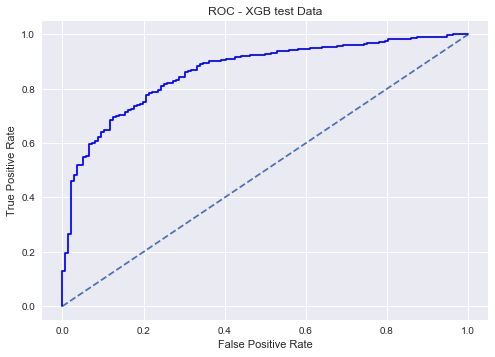

XGB_test_auc 0.8633312020460358


In [1181]:
XGB_test_auc, XGB_test_fpr, XGB_test_tpr = draw_auc_roc(XGB_model, X_test, y_test, 'b', 'ROC - XGB test Data')
print('XGB_test_auc', XGB_test_auc)

In [1103]:
scores = cross_val_score(XGB_model, X_train_res, y_train_res, cv=10)
scores

array([0.7852349 , 0.77852349, 0.70945946, 0.78378378, 0.89189189,
       0.91216216, 0.85810811, 0.91216216, 0.89189189, 0.90540541])

In [1104]:
XGB_train_CVmean = scores.mean()
XGB_train_CVdev = scores.std() * 2
print("XGBoost Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

XGBoost Train Accuracy: 0.84 (+/- 0.14)


In [1105]:
scores = cross_val_score(XGB_model, X_test, y_test, cv=10)
scores

array([0.84782609, 0.73913043, 0.84782609, 0.7826087 , 0.76086957,
       0.84782609, 0.7826087 , 0.7826087 , 0.73333333, 0.77777778])

In [1106]:
XGB_test_CVmean = scores.mean()
XGB_test_CVdev = scores.std() * 2
print("XGBoost Test Accuracy: %0.2f (+/- %0.2f)" % (XGB_test_CVmean, XGB_test_CVdev))

XGBoost Test Accuracy: 0.79 (+/- 0.08)


feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : XGB_model.feature_importances_ })
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(8,8))
sns.barplot(y='Feature', x='Importance', data=feature_rank)

## Gradient Boosting Classifier

In [1182]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_model = GradientBoostingClassifier(n_estimators = 500, max_depth = 10)
#GBC_model.fit(X_train_res, y_train_res)
GBC_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=500)

In [1183]:
#ytrain_predict = GBC_model.predict(X_train_res)
ytrain_predict = XGB_model.predict(X_train)
ytest_predict = GBC_model.predict(X_test)

In [1184]:
#GBC_met,GBC_train_accu,GBC_train_precision,GBC_train_recall,GBC_train_f1 = performance_matrices(GBC_model, X_train_res, y_train_res, ytrain_predict)
GBC_met,GBC_train_accu,GBC_train_precision,GBC_train_recall,GBC_train_f1 = performance_matrices(GBC_model, X_train, y_train, ytrain_predict)
print ('GBC_train_accu ',GBC_train_accu)
print ('GBC_train_precision ',GBC_train_precision)
print ('GBC_train_recall ',GBC_train_recall)
print ('GBC_train_f1 ',GBC_train_f1)

GBC_train_accu  1.0
GBC_train_precision  0.89
GBC_train_recall  0.79
GBC_train_f1  0.84


In [1185]:
GBC_met,GBC_test_accu,GBC_test_precision,GBC_test_recall,GBC_test_f1 = performance_matrices(GBC_model, X_test, y_test, ytest_predict)
print ('GBC_test_accu ',GBC_test_accu)
print ('GBC_test_precision ',GBC_test_precision)
print ('GBC_test_recall ',GBC_test_recall)
print ('GBC_test_f1 ',GBC_test_f1)

GBC_test_accu  0.77
GBC_test_precision  0.62
GBC_test_recall  0.59
GBC_test_f1  0.6


## Final Model Comparison

In [1108]:
index=['Accuracy','AUC','Recall','Precision','F1 Score']
perf_data = pd.DataFrame({'Logit Train':[logit_train_accu,logit_train_auc,logit_train_recall,logit_train_precision,logit_train_f1],
                     'Logit Test':[logit_test_accu,logit_test_auc,logit_test_recall,logit_test_precision,logit_test_f1],
                     'LDA Train':[LDA_train_accu,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
                     'LDA Test':[LDA_test_accu,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],
                     'KNN Train':[KNN_train_accu,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
                     'KNN Test':[KNN_test_accu,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
                     'MNB Train':[MNB_train_accu,MNB_train_auc,MNB_train_recall,MNB_train_precision,MNB_train_f1],
                     'MNB Test':[MNB_test_accu,MNB_test_auc,MNB_test_recall,MNB_test_precision,MNB_test_f1],
                     'SVM Train':[SVM_train_accu,SVM_train_auc,SVM_train_recall,SVM_train_precision,SVM_train_f1],
                     'SVM Test':[SVM_test_accu,SVM_test_auc,SVM_test_recall,SVM_test_precision,SVM_test_f1],
                     'Bagging Train':[Bagging_train_accu,Bagging_train_auc,Bagging_train_recall,Bagging_train_precision,Bagging_train_f1],
                     'Bagging Test':[Bagging_test_accu,Bagging_test_auc,Bagging_test_recall,Bagging_test_precision,Bagging_test_f1],
                     'XGB Train':[XGB_train_accu,XGB_train_auc,XGB_train_recall,XGB_train_precision,XGB_train_f1],
                     'XGB Test':[XGB_test_accu,XGB_test_auc,XGB_test_recall,XGB_test_precision,XGB_test_f1]
                    },index=index)
round(perf_data,2)

,Logit Train,Logit Test,LDA Train,LDA Test,KNN Train,KNN Test,MNB Train,MNB Test,SVM Train,SVM Test,Bagging Train,Bagging Test,XGB Train,XGB Test
Accuracy,0.86,0.80,0.86,0.81,0.85,0.74,0.82,0.80,0.60,0.62,0.98,0.79,0.90,0.79
AUC,0.93,0.85,0.93,0.85,0.95,0.79,0.87,0.88,0.68,0.68,1.00,0.85,0.97,0.85
Recall,0.86,0.69,0.85,0.71,0.93,0.75,0.70,0.66,0.55,0.59,0.98,0.73,0.91,0.69
Precision,0.86,0.65,0.86,0.66,0.81,0.54,0.72,0.67,0.61,0.40,0.98,0.63,0.90,0.64
F1 Score,0.86,0.67,0.86,0.69,0.86,0.63,0.71,0.67,0.58,0.48,0.98,0.68,0.90,0.66


In [1109]:
index=['CV Mean Accuracy','CV Deviation (+/-)']
CV_data = pd.DataFrame({'Logit Train':[logit_train_CVmean,logit_train_CVdev],
                     'Logit Test':[logit_test_CVmean,logit_test_CVdev],
                     'LDA Train':[LDA_train_CVmean,LDA_train_CVdev],
                     'LDA Test':[LDA_test_CVmean,LDA_test_CVdev],
                     'KNN Train':[KNN_train_CVmean,KNN_train_CVdev],
                     'KNN Test':[KNN_test_CVmean,KNN_test_CVdev],
                     'MNB Train':[MNB_train_CVmean,MNB_train_CVdev],
                     'MNB Test':[MNB_test_CVmean,MNB_test_CVdev],
                     'SVM Train':[SVM_train_CVmean,SVM_train_CVdev],
                     'SVM Test':[SVM_test_CVmean,SVM_test_CVdev],
                     'Bagging Train':[Bagging_train_CVmean,Bagging_train_CVdev],
                     'Bagging Test':[Bagging_test_CVmean,Bagging_test_CVdev],
                     'XGB Train':[XGB_train_CVmean,XGB_train_CVdev],
                     'XGB Test':[XGB_test_CVmean,XGB_test_CVdev]
                    },index=index)
round(CV_data,2)

,Logit Train,Logit Test,LDA Train,LDA Test,KNN Train,KNN Test,MNB Train,MNB Test,SVM Train,SVM Test,Bagging Train,Bagging Test,XGB Train,XGB Test
CV Mean Accuracy,0.84,0.80,0.84,0.81,0.81,0.79,0.81,0.81,0.69,0.70,0.84,0.77,0.84,0.79
CV Deviation (+/-),0.14,0.13,0.13,0.10,0.10,0.13,0.07,0.09,0.01,0.02,0.10,0.09,0.14,0.08


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text yticklabel objects>)

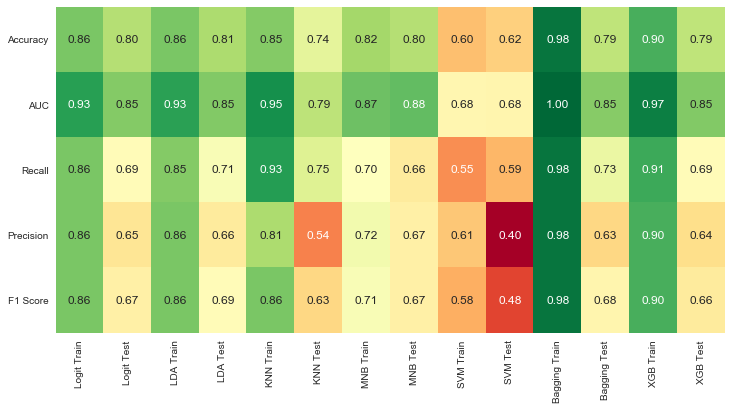

In [1110]:
plt.subplots(figsize=(12,6))
ax = sns.heatmap(perf_data, cmap='RdYlGn', annot=True, fmt='.2f',annot_kws={"fontsize":12}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0) 

(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

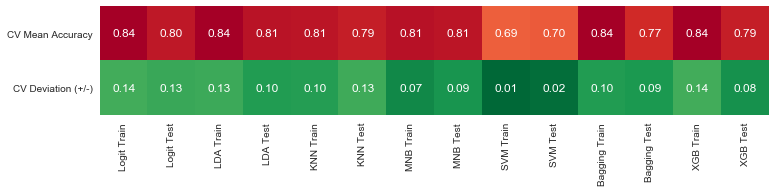

In [1111]:
plt.subplots(figsize=(12,2))
ax = sns.heatmap(CV_data, cmap='RdYlGn_r', annot=True, fmt='.2f',annot_kws={"fontsize":12}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)

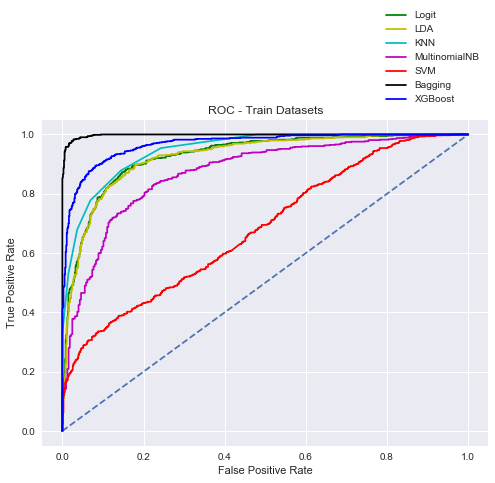

In [1112]:
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_train_fpr, logit_train_tpr,color='g',label="Logit")
plt.plot(LDA_train_fpr,LDA_train_tpr,color='y',label="LDA")
plt.plot(KNN_train_fpr,KNN_train_tpr,color='c',label="KNN")
plt.plot(MNB_train_fpr,MNB_train_tpr,color='m',label="MultinomialNB")
plt.plot(SVM_train_fpr,SVM_train_tpr,color='r',label="SVM")
plt.plot(Bagging_train_fpr,Bagging_train_tpr,color='k',label="Bagging")
plt.plot(XGB_train_fpr,XGB_train_tpr,color='b',label="XGBoost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train Datasets')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

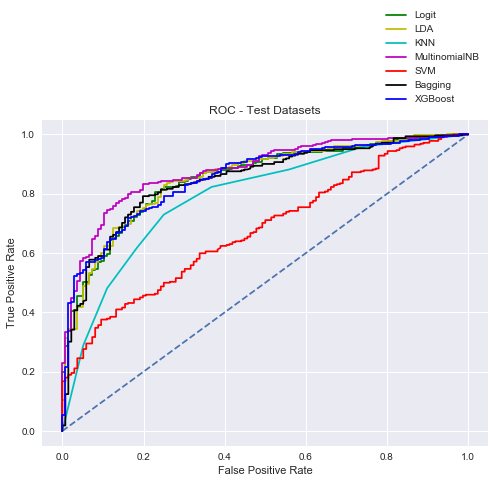

In [1113]:
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_test_fpr, logit_test_tpr,color='g',label="Logit")
plt.plot(LDA_test_fpr,LDA_test_tpr,color='y',label="LDA")
plt.plot(KNN_test_fpr,KNN_test_tpr,color='c',label="KNN")
plt.plot(MNB_test_fpr,MNB_test_tpr,color='m',label="MultinomialNB")
plt.plot(SVM_test_fpr,SVM_test_tpr,color='r',label="SVM")
plt.plot(Bagging_test_fpr,Bagging_test_tpr,color='k',label="Bagging")
plt.plot(XGB_test_fpr,XGB_test_tpr,color='b',label="XGBoost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test Datasets')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')